In [11]:
# -----------------------------------------------------------------------------------
# 파일명       : Data_Preprocessing.ipynb
# 설명         : 스켈레톤 시계열 데이터를 모델 학습을 위해 전처리
#                데이터 보간, 결측치 처리 등의 기능을 포함
# 작성자       : 이민하
# 작성일       : 2025-04-20
# 
# 사용 모듈    :
# - pandas       # 데이터프레임 기반 데이터 처리
# - numpy        # 수치 계산 및 배열 연산
# - os           # 파일 및 경로 관리
# - cv2          # OpenCV를 활용한 이미지 및 비디오 처리
# - matplotlib   # 시각화 및 그래프 출력
# -----------------------------------------------------------------------------------
# >> 주요 기능
# - 랜드마크 결측치 보간 (ffill(), bfill(), interpolate() 사용)
# - 라벨링 데이터의 결측치 처리
# -----------------------------------------------------------------------------------


In [12]:
# 데이터프레임 기반 데이터 처리
import pandas as pd

# 수치 계산 및 배열 연산
import numpy as np

# 파일 및 경로 관리
import os

# OpenCV를 활용한 이미지 및 비디오 처리
import cv2

# 시각화 및 그래프 출력
import matplotlib.pyplot as plt

In [13]:
# 저장 경로 설정
DATA_PATH = "./Dataset"

# 경로 내 CSV파일 경로 저장
csv_files = sorted([os.path.join(DATA_PATH, f) for f in os.listdir(DATA_PATH) if f.endswith('.csv')])

csv_files

['./Dataset\\pose_landmark_0001.csv',
 './Dataset\\pose_landmark_0002.csv',
 './Dataset\\pose_landmark_0003.csv',
 './Dataset\\pose_landmark_0004.csv',
 './Dataset\\pose_landmark_0005.csv',
 './Dataset\\pose_landmark_0006.csv',
 './Dataset\\pose_landmark_0007.csv',
 './Dataset\\pose_landmark_0008.csv',
 './Dataset\\pose_landmark_0009.csv',
 './Dataset\\pose_landmark_0010.csv',
 './Dataset\\pose_landmark_0011.csv',
 './Dataset\\pose_landmark_0012.csv',
 './Dataset\\pose_landmark_0013.csv',
 './Dataset\\pose_landmark_0014.csv',
 './Dataset\\pose_landmark_0015.csv',
 './Dataset\\pose_landmark_0016.csv',
 './Dataset\\pose_landmark_0017.csv',
 './Dataset\\pose_landmark_0018.csv',
 './Dataset\\pose_landmark_0019.csv',
 './Dataset\\pose_landmark_0020.csv',
 './Dataset\\pose_landmark_0021.csv',
 './Dataset\\pose_landmark_0022.csv',
 './Dataset\\pose_landmark_0023.csv',
 './Dataset\\pose_landmark_0024.csv',
 './Dataset\\pose_landmark_0025.csv',
 './Dataset\\pose_landmark_0026.csv',
 './Dataset\

In [18]:
# 데이터 저장 경로 설정
SAVE_PATH = "./New_Dataset/"

empty_data = []

for i, csv in enumerate(csv_files):
    # CSV 불러오기
    df = pd.read_csv(csv)

    if len(df) > 0:        
    
        # 프레임과 랜드마크 ID 목록 생성
        # 1 ~ 600 프레임까지 (10초짜리 영상을 초당 20프레임만큼 추출 -> step = 3)
        all_frames = np.arange(1, 601, 3)
        all_landmarks = df['landmark_id'].unique()

        df_frames = df["frame"].unique()

        frame_list = []
        landmark_list = []

        # 초당 20프레임 중 비어있는 항목까지 추가
        for frame in all_frames:
            if frame not in df_frames:
                for landmark in all_landmarks:
                    frame_list.append(frame)
                    landmark_list.append(landmark)
        
        # 비어있는 항목에 결측치가 있는 초당 20프레임을 측정한 데이터프레임 생성
        add_row = pd.DataFrame({"frame" : frame_list, "landmark_id" : landmark_list})

        df = pd.concat([df, add_row], ignore_index = True)

        df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
        df = df.sort_values(by = ["frame", "landmark_id"])
        
        # 새롭게 바꾼 데이터프레임을 CSV 파일로 저장
        df.to_csv(SAVE_PATH + f"pose_landmark_{i + 1:04d}.csv", index = False)

    else:
        csv_num = csv.split('_')[2][:4]
        print(f"스킵 (컬럼 없음): {csv_num}")
        empty_data.append(csv_num)
        continue



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0031
스킵 (컬럼 없음): 0032
스킵 (컬럼 없음): 0039
스킵 (컬럼 없음): 0040
스킵 (컬럼 없음): 0041
스킵 (컬럼 없음): 0043
스킵 (컬럼 없음): 0044


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0080
스킵 (컬럼 없음): 0088


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0105
스킵 (컬럼 없음): 0106
스킵 (컬럼 없음): 0109
스킵 (컬럼 없음): 0110
스킵 (컬럼 없음): 0115


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0122
스킵 (컬럼 없음): 0123


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0138
스킵 (컬럼 없음): 0139


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0170
스킵 (컬럼 없음): 0171
스킵 (컬럼 없음): 0179


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0187
스킵 (컬럼 없음): 0188


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0209
스킵 (컬럼 없음): 0212


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0234


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0252


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0268


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0324
스킵 (컬럼 없음): 0332


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0339
스킵 (컬럼 없음): 0340
스킵 (컬럼 없음): 0343


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0381
스킵 (컬럼 없음): 0389


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0397


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0417
스킵 (컬럼 없음): 0425


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0432
스킵 (컬럼 없음): 0433
스킵 (컬럼 없음): 0435
스킵 (컬럼 없음): 0441


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0460


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0473
스킵 (컬럼 없음): 0481
스킵 (컬럼 없음): 0482


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0497
스킵 (컬럼 없음): 0499


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0564
스킵 (컬럼 없음): 0573


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0576
스킵 (컬럼 없음): 0579
스킵 (컬럼 없음): 0580


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0630
스킵 (컬럼 없음): 0636


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0646
스킵 (컬럼 없음): 0647
스킵 (컬럼 없음): 0650
스킵 (컬럼 없음): 0652
스킵 (컬럼 없음): 0655


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0660


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0687
스킵 (컬럼 없음): 0693
스킵 (컬럼 없음): 0694


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0701
스킵 (컬럼 없음): 0702
스킵 (컬럼 없음): 0703
스킵 (컬럼 없음): 0710


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0734
스킵 (컬럼 없음): 0735
스킵 (컬럼 없음): 0743


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0749
스킵 (컬럼 없음): 0750
스킵 (컬럼 없음): 0751


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0767


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0863
스킵 (컬럼 없음): 0864
스킵 (컬럼 없음): 0872


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0903
스킵 (컬럼 없음): 0904
스킵 (컬럼 없음): 0907


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0926
스킵 (컬럼 없음): 0933


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0935
스킵 (컬럼 없음): 0936
스킵 (컬럼 없음): 0940


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0949
스킵 (컬럼 없음): 0956
스킵 (컬럼 없음): 0957


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0963
스킵 (컬럼 없음): 0964
스킵 (컬럼 없음): 0973
스킵 (컬럼 없음): 0974


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0979
스킵 (컬럼 없음): 0981
스킵 (컬럼 없음): 0983
스킵 (컬럼 없음): 0986
스킵 (컬럼 없음): 0987
스킵 (컬럼 없음): 0988
스킵 (컬럼 없음): 0989
스킵 (컬럼 없음): 0992


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 0995
스킵 (컬럼 없음): 0996


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1128


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1163


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1177


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1206
스킵 (컬럼 없음): 1207


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1230


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1253


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1283
스킵 (컬럼 없음): 1287
스킵 (컬럼 없음): 1288


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1296


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1314
스킵 (컬럼 없음): 1323


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1371
스킵 (컬럼 없음): 1380


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1397


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1410


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1425
스킵 (컬럼 없음): 1426
스킵 (컬럼 없음): 1433
스킵 (컬럼 없음): 1435


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1443
스킵 (컬럼 없음): 1446
스킵 (컬럼 없음): 1449


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1464
스킵 (컬럼 없음): 1465
스킵 (컬럼 없음): 1468
스킵 (컬럼 없음): 1471
스킵 (컬럼 없음): 1472
스킵 (컬럼 없음): 1473


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1479
스킵 (컬럼 없음): 1480
스킵 (컬럼 없음): 1484
스킵 (컬럼 없음): 1485
스킵 (컬럼 없음): 1487
스킵 (컬럼 없음): 1488


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1558
스킵 (컬럼 없음): 1561


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1590


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1601
스킵 (컬럼 없음): 1602
스킵 (컬럼 없음): 1607
스킵 (컬럼 없음): 1611
스킵 (컬럼 없음): 1612


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1618
스킵 (컬럼 없음): 1622
스킵 (컬럼 없음): 1628
스킵 (컬럼 없음): 1629


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1631
스킵 (컬럼 없음): 1633
스킵 (컬럼 없음): 1635
스킵 (컬럼 없음): 1636
스킵 (컬럼 없음): 1639
스킵 (컬럼 없음): 1643
스킵 (컬럼 없음): 1644


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1655


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1671
스킵 (컬럼 없음): 1679


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1686
스킵 (컬럼 없음): 1689
스킵 (컬럼 없음): 1690


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1704
스킵 (컬럼 없음): 1709


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1718


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1728


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1757


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1788
스킵 (컬럼 없음): 1791
스킵 (컬럼 없음): 1792
스킵 (컬럼 없음): 1799
스킵 (컬럼 없음): 1800


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1807
스킵 (컬럼 없음): 1808


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1902
스킵 (컬럼 없음): 1903
스킵 (컬럼 없음): 1912


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1916
스킵 (컬럼 없음): 1917
스킵 (컬럼 없음): 1919
스킵 (컬럼 없음): 1920


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1948
스킵 (컬럼 없음): 1949
스킵 (컬럼 없음): 1956
스킵 (컬럼 없음): 1957
스킵 (컬럼 없음): 1960


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1963
스킵 (컬럼 없음): 1965
스킵 (컬럼 없음): 1973


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1979
스킵 (컬럼 없음): 1980
스킵 (컬럼 없음): 1981
스킵 (컬럼 없음): 1982
스킵 (컬럼 없음): 1987
스킵 (컬럼 없음): 1988
스킵 (컬럼 없음): 1989
스킵 (컬럼 없음): 1991
스킵 (컬럼 없음): 1992


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 1997
스킵 (컬럼 없음): 1999
스킵 (컬럼 없음): 2005
스킵 (컬럼 없음): 2006


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 2012
스킵 (컬럼 없음): 2013
스킵 (컬럼 없음): 2020
스킵 (컬럼 없음): 2021


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

스킵 (컬럼 없음): 2027
스킵 (컬럼 없음): 2028
스킵 (컬럼 없음): 2029
스킵 (컬럼 없음): 2030
스킵 (컬럼 없음): 2037
스킵 (컬럼 없음): 2039
스킵 (컬럼 없음): 2040
스킵 (컬럼 없음): 2042
스킵 (컬럼 없음): 2043


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark_id").apply(lambda x : x.sort_values(by = ["frame", "landmark_id"]).interpolate().ffill().bfill()).reset_index(drop=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7148\211791541.py:34: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("landmark

In [19]:
empty_data

['0031',
 '0032',
 '0039',
 '0040',
 '0041',
 '0043',
 '0044',
 '0080',
 '0088',
 '0105',
 '0106',
 '0109',
 '0110',
 '0115',
 '0122',
 '0123',
 '0138',
 '0139',
 '0170',
 '0171',
 '0179',
 '0187',
 '0188',
 '0209',
 '0212',
 '0234',
 '0252',
 '0268',
 '0324',
 '0332',
 '0339',
 '0340',
 '0343',
 '0381',
 '0389',
 '0397',
 '0417',
 '0425',
 '0432',
 '0433',
 '0435',
 '0441',
 '0460',
 '0473',
 '0481',
 '0482',
 '0497',
 '0499',
 '0564',
 '0573',
 '0576',
 '0579',
 '0580',
 '0630',
 '0636',
 '0646',
 '0647',
 '0650',
 '0652',
 '0655',
 '0660',
 '0687',
 '0693',
 '0694',
 '0701',
 '0702',
 '0703',
 '0710',
 '0734',
 '0735',
 '0743',
 '0749',
 '0750',
 '0751',
 '0767',
 '0863',
 '0864',
 '0872',
 '0903',
 '0904',
 '0907',
 '0926',
 '0933',
 '0935',
 '0936',
 '0940',
 '0949',
 '0956',
 '0957',
 '0963',
 '0964',
 '0973',
 '0974',
 '0979',
 '0981',
 '0983',
 '0986',
 '0987',
 '0988',
 '0989',
 '0992',
 '0995',
 '0996',
 '1128',
 '1163',
 '1177',
 '1206',
 '1207',
 '1230',
 '1253',
 '1283',
 

In [ ]:
# 관절 위치 디버깅 함수 
def draw_landmarks_sequential(video_path, csv_path, resize=(960, 540)):
    # 관절 위치 좌표 데이터 불러오기
    df = pd.read_csv(csv_path)
    # 영상 데이터 불러오기
    cap = cv2.VideoCapture(video_path)

    # 영상 크기 설정
    original_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    frame_id = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        landmarks = df[df['frame'] == frame_id]

        # 영상에 랜드마크별 좌표 그리기
        for _, row in landmarks.iterrows():
            
            # 영상 크기에 따른 좌표값 일반화
            x = int(row['x'] * original_width)
            y = int(row['y'] * original_height)

            # 좌표값에 원 그리기
            cv2.circle(frame, (x, y), 15, (0, 255, 0), -1)

        if resize:
            frame = cv2.resize(frame, resize)

        cv2.imshow("Pose Replay", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):  # 1ms로 재생
            break

        frame_id += 0.5 # 영상 : 60fps, 데이터 : 30fps 기준

    cap.release()
    cv2.destroyAllWindows()

# 영상 데이터 경로 설정
VIDEO_PATH = r"F:/Fall_Detection_Data/Source_Data/Video/"

# 관절 좌표 데이터 경로 설정
CSV_PATH = "./New_Dataset/"


# CSV 파일 경로 저장
csv_files = []

for file in os.listdir(CSV_PATH):
    csv_files.append(os.path.join(CSV_PATH, file))

# 영상 데이터 경로 저장
path_list = []

for dirpath, _, filenames in os.walk(VIDEO_PATH):
    for filename in filenames:
        if filename.endswith((".mp4", ".MP4")):
            path_list.append(os.path.join(dirpath, filename))

# 영상별로 관절 위치 디버깅
for i, path in enumerate(path_list):
    draw_landmarks_sequential(path, csv_files[i])

KeyboardInterrupt: 

: 

In [20]:
# 라벨링 데이터 불러오기
label_df = pd.read_csv("Label.csv")

label_df

,source_index,label
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
3029,3247,0
3030,3248,0
3031,3249,0
3032,3250,0


In [21]:
# 병합된 관절 데이터 불러오기
data_df = pd.read_csv("20fps_merged_data.csv")

data_df

,frame,landmark_id,x,y,z,source_index
0,1.0,0.0,0.534656,0.416467,-0.477569,1
1,1.0,11.0,0.506879,0.362319,-0.296731,1
2,1.0,12.0,0.470053,0.432068,-0.470912,1
3,1.0,13.0,0.491338,0.424686,-0.092969,1
4,1.0,14.0,0.488137,0.554078,-0.506073,1
...,...,...,...,...,...,...
7919764,598.0,24.0,0.305442,0.483960,-0.111092,3251
7919765,598.0,25.0,0.446640,0.431374,0.016606,3251
7919766,598.0,26.0,0.427406,0.532882,-0.164726,3251
7919767,598.0,29.0,0.458954,0.648930,0.114675,3251


In [23]:
label_source_index = label_df["source_index"].unique()
data_source_index = data_df["source_index"].unique()

# # 결측치 제거 후 사라진 영상의 데이터 제거
# for i in label_source_index:
#     if i not in data_source_index:
#         idx = label_df[label_df["source_index"] == i].index
#         label_df.drop(idx, axis = 0, inplace = True)

In [24]:
len(data_source_index)

3034

In [25]:
len(label_df)

3034

데이터 수: Fall - 1361, Not Fall - 1673


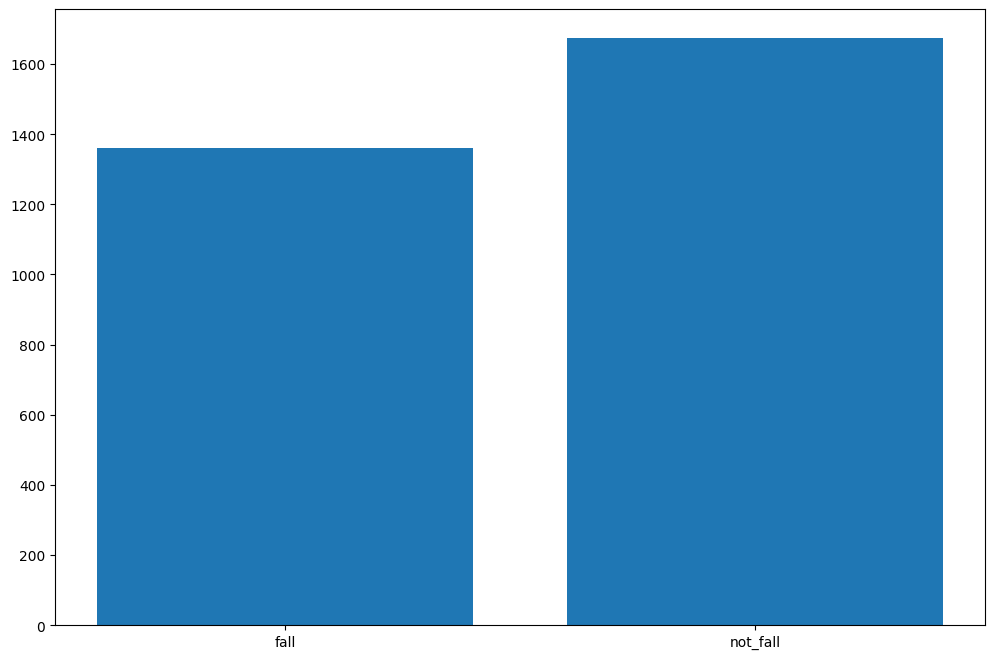

In [27]:
# 데이터 불균형 확인
fall = len(label_df[label_df["label"] == 1])
not_fall = len(label_df[label_df["label"] == 0])

print(f"데이터 수: Fall - {fall}, Not Fall - {not_fall}")

plt.figure(figsize = (12, 8))
plt.bar(["fall", "not_fall"], [fall, not_fall])
plt.show()